In [9]:
import scipy.io
from scipy.signal import butter, sosfilt, freqs

import matplotlib.pyplot as plt

import numpy as np

In [10]:
mat = scipy.io.loadmat("../data/umich/S02.mat")
x = mat["raw"][0][0][3][0][0]

print(x.shape)
print(x)

(62, 365325)
[[ 12277.97851562  12277.19726562  12279.93164062 ...   7790.18554688
    7784.9609375    7779.00390625]
 [  8724.90234375   8723.09570312   8727.58789062 ...   3915.13671875
    3901.7578125    3892.1875    ]
 [  9297.50976562   9300.24414062   9303.7109375  ...   4695.36132812
    4682.17773438   4671.24023438]
 ...
 [-11114.74609375 -11120.26367188 -11123.73046875 ... -13585.9375
  -13583.88671875 -13583.25195312]
 [180576.734375   183518.53125    177698.4375     ... 108964.7421875
  111918.1484375  108053.6875    ]
 [ 60285.92578125 199089.9375     116927.921875   ...   7041.69287109
    6142.55664062   5598.96240234]]


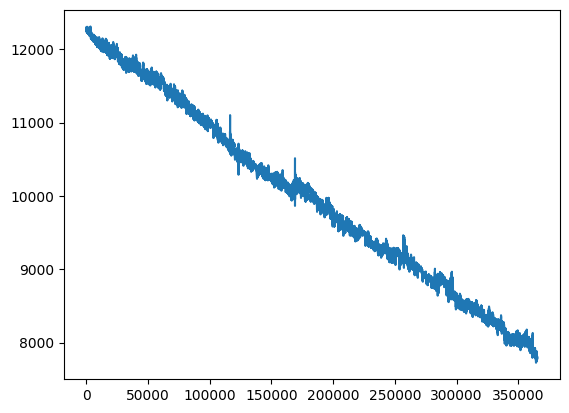

In [11]:
plt.plot(x[0])

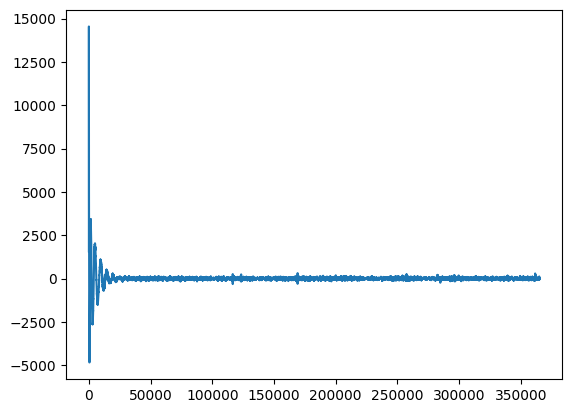

In [12]:
sos = butter(10, (0.1, 200), 'bandpass', fs=500, output='sos')
filtered = sosfilt(sos, x[0])

plt.plot(filtered)

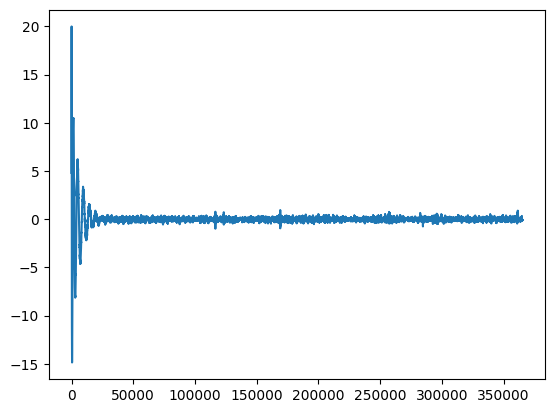

In [20]:
# subtracting average 0.5s + clamping

final_filtered = filtered

final_filtered = final_filtered - np.mean(final_filtered[:int(500*0.5)])
final_filtered = (final_filtered - np.mean(final_filtered)) / np.std(final_filtered)
final_filtered = np.clip(final_filtered, -20, 20)

plt.plot(final_filtered)